In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


In [178]:
#veri toplama
data_path = "C:/Users/Lenovo/Desktop/heart.csv"
data_frame = pd.read_csv(data_path)

In [179]:
data_frame.head(60)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [180]:
data_frame.isnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4234,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [181]:
data_frame.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [182]:
data_frame = data_frame.fillna(data_frame.mean())

In [183]:
data_frame.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [184]:
print(data_frame.dtypes)

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


In [185]:
# Korelasyon matrisini hesaplama
correlation_matrix = data_frame.corr()

# Korelasyon matrisini görüntüleme
print(correlation_matrix)

                     male       age  education  currentSmoker  cigsPerDay  \
male             1.000000 -0.028979   0.017126       0.197596    0.316807   
age             -0.028979  1.000000  -0.163613      -0.213748   -0.192366   
education        0.017126 -0.163613   1.000000       0.018301    0.007962   
currentSmoker    0.197596 -0.213748   0.018301       1.000000    0.766970   
cigsPerDay       0.316807 -0.192366   0.007962       0.766970    1.000000   
BPMeds          -0.052204  0.121980  -0.010607      -0.048632   -0.045826   
prevalentStroke -0.004546  0.057655  -0.035110      -0.032988   -0.032706   
prevalentHyp     0.005313  0.307194  -0.080993      -0.103260   -0.065947   
diabetes         0.015708  0.101258  -0.038146      -0.044295   -0.037063   
totChol         -0.069974  0.260270  -0.022507      -0.046285   -0.026025   
sysBP           -0.035989  0.394302  -0.128260      -0.130230   -0.088505   
diaBP            0.057933  0.206104  -0.061755      -0.107746   -0.056391   

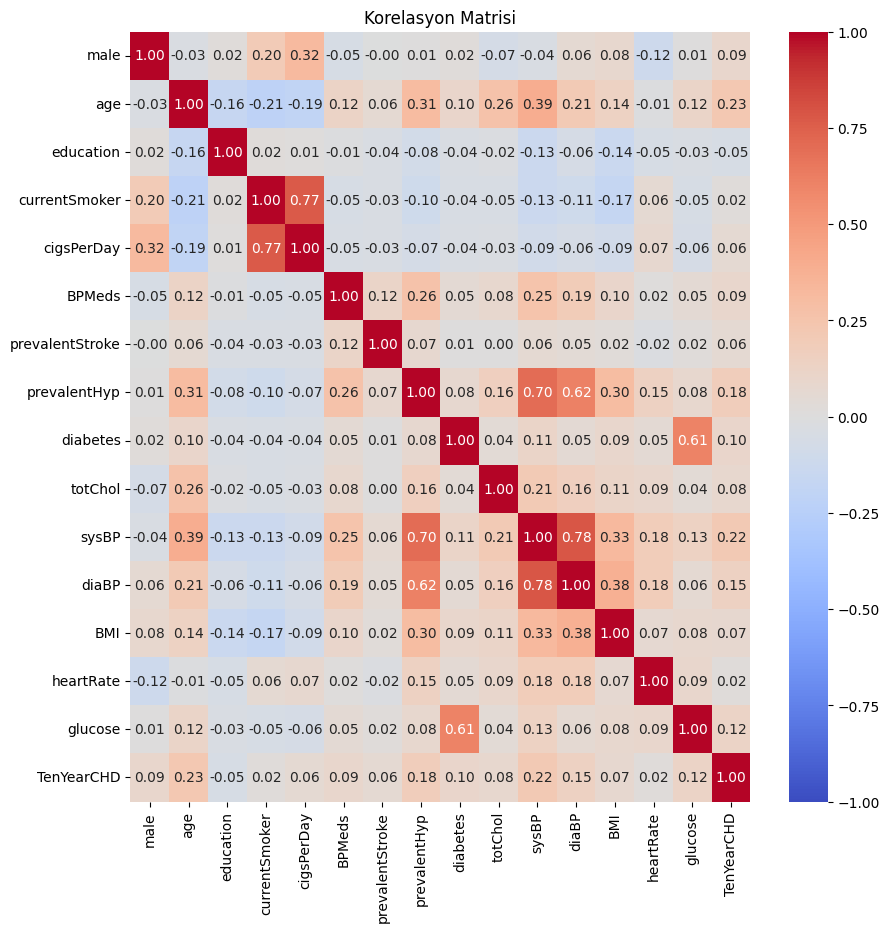

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisinin ısı haritasını oluşturma
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Başlık ekleme
plt.title('Korelasyon Matrisi')
plt.show()


In [187]:
data_frame.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [188]:
X = data_frame[['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'
]]
y = data_frame['TenYearCHD']

In [189]:

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [190]:
# Model kurma
model = LogisticRegression()
# Modeli eğitim verisi ile eğitme

model = LogisticRegression(class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

c:\Users\Lenovo\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=42)

In [191]:
y_pred = model.predict(X_test)
y_pred


array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [192]:
print(y_train.value_counts())
print(y_test.value_counts())


TenYearCHD
0    2515
1     451
Name: count, dtype: int64
TenYearCHD
0    1079
1     193
Name: count, dtype: int64


In [193]:
# Doğru tahminleri kıyaslayın
print(f"Gerçek Değerler: {y_test[:5].values}")
print(f"Tahminler: {y_pred[:5]}")



Gerçek Değerler: [1 0 1 0 0]
Tahminler: [0 0 1 0 0]


In [194]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Doğruluk
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk (Accuracy): {accuracy}")

# Sınıflandırma raporu
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

# Karışıklık matrisi
print("Karışıklık Matrisi:")
print(confusion_matrix(y_test, y_pred))


Doğruluk (Accuracy): 0.6470125786163522
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1079
           1       0.24      0.62      0.35       193

    accuracy                           0.65      1272
   macro avg       0.57      0.64      0.55      1272
weighted avg       0.81      0.65      0.70      1272

Karışıklık Matrisi:
[[703 376]
 [ 73 120]]


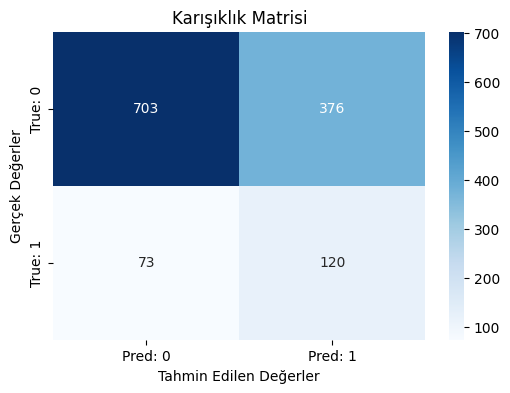

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Karışıklık matrisi
conf_matrix = confusion_matrix(y_test, y_pred)

# Görsel oluşturma
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.title('Karışıklık Matrisi')
plt.ylabel('Gerçek Değerler')
plt.xlabel('Tahmin Edilen Değerler')
plt.show()


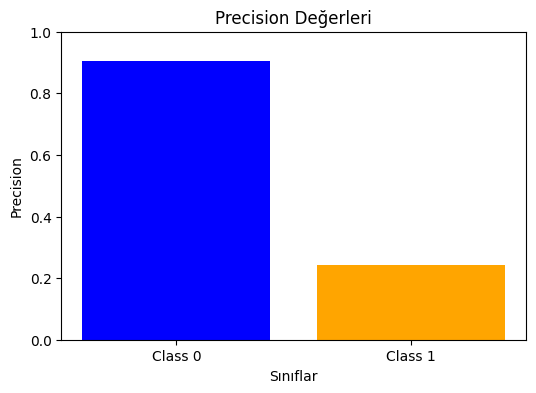

In [196]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score

# Precision değerlerini hesapla
precision_0 = precision_score(y_test, y_pred, pos_label=0)
precision_1 = precision_score(y_test, y_pred, pos_label=1)

# Precision değerlerini bir listeye koy
precisions = [precision_0, precision_1]

# Çubuk grafik oluşturma
labels = ['Class 0', 'Class 1']

plt.figure(figsize=(6, 4))
plt.bar(labels, precisions, color=['blue', 'orange'])
plt.ylim(0, 1)
plt.title('Precision Değerleri')
plt.xlabel('Sınıflar')
plt.ylabel('Precision')
plt.show()
